In [4]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/My\ Drive/Sdataset-200

/content/gdrive/My Drive/Sdataset-200


In [ ]:
# pip install sklearn.externals

/content/gdrive/My Drive/Sdataset-200
Found 831 images belonging to 10 classes.
Found 175 images belonging to 10 classes.


INFO:log:---after conv-1----
INFO:log:---after conv-2----
INFO:log:---after conv-3----
INFO:log:---after conv-4----
--- Logging error ---
Traceback (most recent call last):
  File "/usr/lib/python3.7/logging/__init__.py", line 1025, in emit
    msg = self.format(record)
  File "/usr/lib/python3.7/logging/__init__.py", line 869, in format
    return fmt.format(record)
  File "/usr/lib/python3.7/logging/__init__.py", line 608, in format
    record.message = record.getMessage()
  File "/usr/lib/python3.7/logging/__init__.py", line 369, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   


  File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
    app.start()
  File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
    self.asyncio_loop.run_forever()
  File "/usr/lib/python3.7/asyncio/base_events.py", line 541, in run_forever
    self._run_once()
  File "/usr/lib/python3.7/asyncio/base_events.py", line 1786, in _run_once
    handle._run()
  File "/usr/lib/python3.7/asyncio/events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "/usr

 conv2d (Conv2D)             (None, 48, 48, 64)        1792      
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       204928    
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 128)      512       
 hNormaliz

INFO:log:---after 15 epochs----


Epoch 1/15
12/12 [==============================] - 227s 19s/step - loss: 1.8825 - accuracy: 0.3742 - val_loss: 26.6611 - val_accuracy: 0.0938
Epoch 2/15
12/12 [==============================] - 3s 291ms/step - loss: 1.1654 - accuracy: 0.5880 - val_loss: 21.4998 - val_accuracy: 0.1484
Epoch 3/15
12/12 [==============================] - 4s 293ms/step - loss: 0.8041 - accuracy: 0.7109 - val_loss: 15.0252 - val_accuracy: 0.1016
Epoch 4/15
12/12 [==============================] - 3s 292ms/step - loss: 0.6827 - accuracy: 0.7627 - val_loss: 9.5623 - val_accuracy: 0.2266
Epoch 5/15
12/12 [==============================] - 3s 288ms/step - loss: 0.5532 - accuracy: 0.8031 - val_loss: 5.4669 - val_accuracy: 0.2656
Epoch 6/15
12/12 [==============================] - 3s 287ms/step - loss: 0.4158 - accuracy: 0.8657 - val_loss: 5.7051 - val_accuracy: 0.3203
Epoch 7/15
12/12 [==============================] - 3s 286ms/step - loss: 0.3717 - accuracy: 0.8644 - val_loss: 9.3742 - val_accuracy: 0.1484
Epo

INFO:log:---history "{{history}}"----


INFO:tensorflow:Assets written to: ram://7c159d0d-cb69-4ea9-a687-0b85a28e9807/assets


INFO:tensorflow:Assets written to: ram://7c159d0d-cb69-4ea9-a687-0b85a28e9807/assets


'Apple___Apple_scab'

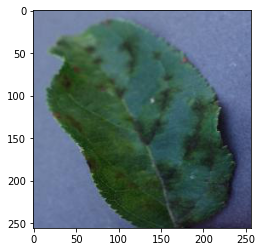

In [ ]:
# importing libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import os
%matplotlib inline
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Flatten, Dropout, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
from IPython.display import SVG, Image
# import pandas as pdß

import logging
logger = logging.getLogger('log')

logging.basicConfig(
    level=logging.INFO 
)

#the below code is to unzip the file imported into drive.
#doesnt take colab Notebooks into account. , do copypath from the option on d side.
# !unzip /content/gdrive/MyDrive/archive.zip

# !unzip /content/gdrive/MyDrive/archive.zip > /dev/null
# !ls "/content/gdrive/MyDrive"


%cd /content/gdrive/My\ Drive/Sdataset-200


# Defining train and test data to train the model
img_size=48
batch_size=64
datagen_train=ImageDataGenerator(horizontal_flip=True)
train_generator=datagen_train.flow_from_directory('/content/gdrive/MyDrive/Sdataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train',target_size=
(48,48), batch_size=batch_size, class_mode='categorical', shuffle=True)
datagen_validation=ImageDataGenerator(horizontal_flip=True)
validation_generator=datagen_train.flow_from_directory('/content/gdrive/MyDrive/Sdataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',target_size=
(48,48), batch_size=batch_size, class_mode='categorical', shuffle=True)

#initialising CNN
model=Sequential()
#conv-1
model.add(Conv2D(64,(3,3), padding='same', input_shape= (48,48,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
logger.info('---after conv-1----')

#conv-2
model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
logger.info('---after conv-2----')

#conv-3
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
logger.info('---after conv-3----')

#conv-4
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

logger.info('---after conv-4----')

model.add(Flatten())
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(10, activation='softmax'))

opt=Adam(learning_rate=0.001)
logger.info('---learning rate----', opt)

#compiling the model
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

epochs=15


steps_per_epoch=train_generator.n//train_generator.batch_size
steps_per_epoch
validation_steps=validation_generator.n//validation_generator.batch_size


logger.info('---after %d epochs----', epochs)

checkpoint=ModelCheckpoint("model_weights.h5", monitor="val_accuracy", save_weights_only=True, model='max', verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', factor=0.1, patience=2, min_lr= 0.00001, model= 'auto')

history= model.fit(
          x=train_generator, steps_per_epoch=steps_per_epoch, epochs=epochs, validation_data=validation_generator, validation_steps=validation_steps)

logger.info('---history "{{history}}"----')

#saving the model

model.save('my_disease.h5')
import pickle

# save the model to disk
filename = 'plant_diesease_model.dmp'
# pickle.dump(model, open(filename, 'wb'), protocol=pickle.HIGHEST_PROTOCOL)
pickle.dump(model, open(filename, 'wb'), protocol=pickle.HIGHEST_PROTOCOL)


#@title Default title text
from tensorflow.keras.models import load_model
# classifier = load_model('my_disease.h5')
classifier = pickle.load(open('plant_diesease_model.pkl', 'rb'))

import numpy as np
from tensorflow.keras.preprocessing import image

path = "/content/gdrive/MyDrive/AppleScab2.JPG"
test_image = image.load_img(path)
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
plt.imshow(test_image)
test_img = image.load_img(path, target_size=(48,48))
test_img = image.img_to_array(test_img)
test_img = np.expand_dims(test_img,axis=0)
result = classifier.predict(test_img)
a = result.argmax()
s = train_generator.class_indices
name = [ ]
for i in s:
     name.append(i)
for i in range(len(s)):
     if (i==a):
          p=name[i]
p

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !python plantdisease.py

[[1.6247261e-05 1.2825808e-04 2.2244018e-07 1.5085129e-07 9.9984813e-01
  3.6165726e-08 4.1130393e-06 1.1200697e-07 2.4624221e-06 2.3678363e-07]]


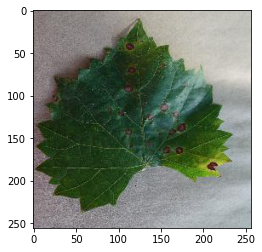

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

from tensorflow.keras.models import load_model
classifier = load_model('my_disease.h5')

path = "/content/gdrive/MyDrive/grape_Blackrot.JPG"
test_image = image.load_img(path)
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
plt.imshow(test_image)
test_img = image.load_img(path, target_size=(48,48))
test_img = image.img_to_array(test_img)
test_img = np.expand_dims(test_img,axis=0)
result = classifier.predict(test_img)
a = result.argmax()
s = train_generator.class_indices
name = [ ]
for i in s:
     name.append(i)
for i in range(len(s)):
     if (i==a):
          p=name[i]
p

# print(result)
# from tensorflow.keras.applications import imagenet_utils
# imagenet_utils.decode_predictions(result)


In [ ]:
import pickle
from tensorflow.keras.preprocessing import image
import numpy as np

datagen_train=ImageDataGenerator(horizontal_flip=True)
train_generator=datagen_train.flow_from_directory('/content/gdrive/MyDrive/Sdataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train',target_size=
(48,48), batch_size=batch_size, class_mode='categorical', shuffle=True)

# /content/gdrive/MyDrive/Sdataset-200/plant_diesease_model.pkl

classifier = pickle.load(open('plant_diesease_model.pkl', 'rb'))

path = "/content/gdrive/MyDrive/AppleScab2.JPG"
test_img = image.load_img(path, target_size=(48,48))
test_img = image.img_to_array(test_img)
test_img = np.expand_dims(test_img,axis=0)
result = classifier.predict(test_img)
a = result.argmax()
s = train_generator.class_indices
name = [ ]
for i in s:
     name.append(i)
for i in range(len(s)):
     if (i==a):
          p=name[i]
p

Found 831 images belonging to 10 classes.
0


'Apple___Apple_scab'

In [ ]:
pip install flask-ngrok

In [ ]:
pip install gevent

     |████████████████████████████████| 5.8 MB 5.3 MB/s 
     |████████████████████████████████| 251 kB 53.6 MB/s 


In [1]:
!pip install pyngrok

!ngrok authtoken 26GlGXL3hc8lkOlYiE4vI0KvzpT_2CbfnHHvWZ9d2qYcoN49r

     |████████████████████████████████| 745 kB 5.2 MB/s 
  Created wheel for pyngrok: filename=pyngrok-5.1.0-py3-none-any.whl size=19007 sha256=cd0bbb070bc1ae8d88b7a8a717da8e17b40d3fab31229ff615cd72dd44c90a5a
  Stored in directory: /root/.cache/pip/wheels/bf/e6/af/ccf6598ecefecd44104069371795cb9b3afbcd16987f6ccfb3
Successfully built pyngrok
Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
!pip install flask_ngrok

In [2]:
from pyngrok import ngrok
ngrok.connect(port='80')

<NgrokTunnel: "http://26fd-35-226-25-36.ngrok.io" -> "http://localhost:80">

In [ ]:
from flask import Flask
# from flask_ngrok import run_with_ngrok


app = Flask(__name__)
# run_with_ngrok(app)

@app.route('/')
def index():
	return 'Hello, Flask!'

%tb

if __name__ == "__main__":
  app.run(port=80)



 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


No traceback available to show.
 * Running on http://127.0.0.1:80/ (Press CTRL+C to quit)
127.0.0.1 - - [12/Mar/2022 07:49:06] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [12/Mar/2022 07:49:18] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [12/Mar/2022 07:49:18] "GET /favicon.ico HTTP/1.1" 404 -


In [5]:
from flask import Flask, render_template, request
import pickle
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import numpy as np

STATIC_FOLDER = '/content/gdrive/MyDrive/Sdataset-200/static/'
IMAGE_STORAGE = f'{STATIC_FOLDER}images/'

app = Flask(__name__, 
            template_folder='/content/gdrive/MyDrive/Sdataset-200/templates',
            static_folder=STATIC_FOLDER)

datagen_train=ImageDataGenerator(horizontal_flip=True)
dataset_path = '/content/gdrive/MyDrive/Sdataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'
train_generator=datagen_train.flow_from_directory(dataset_path,
                                                  target_size=(48,48), 
                                                  batch_size=64, 
                                                  class_mode='categorical', 
                                                  shuffle=True)

@app.route('/', methods=['GET'])
def view_index():
  return render_template('index.html')

@app.route('/', methods=['POST'])
def predict_image():
  image_file = request.files['leaf']
  filename = image_file.filename
  image_file.save(f'{IMAGE_STORAGE}{filename}')
  
  classifier = pickle.load(open('/content/gdrive/MyDrive/Sdataset-200/plant_diesease_model.pkl', 'rb'))

  test_img = image.load_img(f'{IMAGE_STORAGE}{filename}', target_size=(48,48))
  test_img = image.img_to_array(test_img)
  test_img = np.expand_dims(test_img,axis=0)
  result = classifier.predict(test_img)
  a = result.argmax()
  s = train_generator.class_indices
  name = [ ]
  for i in s:
      name.append(i)
  for i in range(len(s)):
      if (i==a):
            p=name[i]

  prediction = {}
  prediction['image'] = f'/static/images/{filename}'
  prediction['result'] = p

  return render_template('index.html', prediction=prediction)

if __name__ == '__main__':
  app.run(port='80')

Found 831 images belonging to 10 classes.
 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:80/ (Press CTRL+C to quit)
127.0.0.1 - - [28/Mar/2022 19:44:47] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [28/Mar/2022 19:44:48] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [28/Mar/2022 19:44:53] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [28/Mar/2022 19:45:16] "POST / HTTP/1.1" 200 -
127.0.0.1 - - [28/Mar/2022 19:45:16] "GET /static/images/0d2e2971-f1c9-4278-b35c-91dd8a22a64d___RS_Early.B%207581.JPG HTTP/1.1" 200 -
127.0.0.1 - - [28/Mar/2022 19:45:33] "POST / HTTP/1.1" 200 -
127.0.0.1 - - [28/Mar/2022 19:45:38] "GET /static/images/3330bad2-38aa-40bd-9938-6128efd96327___UF.Citrus_HLB_Lab%201497.JPG HTTP/1.1" 200 -
127.0.0.1 - - [28/Mar/2022 19:47:48] "POST / HTTP/1.1" 200 -
127.0.0.1 - - [28/Mar/2022 19:47:48] "GET /static/images/0ac36661-a47d-47ff-8948-42edec033b87___Crnl_L.Mold%209127.JPG HTTP/1.1" 200 -
127.0.0.1 - - [28/Mar/2022 19:48:00] "POST / HTTP/1.1" 200 -
127.0.0.1 - - [28/Mar/2022 19:48:02] "GET /static/images/RS_Rust%201565.JPG HTTP/1.1" 200 -


127.0.0.1 - - [28/Mar/2022 19:51:58] "POST / HTTP/1.1" 200 -
127.0.0.1 - - [28/Mar/2022 19:52:00] "GET /static/images/PotatoEarlyBlight1.JPG HTTP/1.1" 200 -


127.0.0.1 - - [28/Mar/2022 19:53:33] "POST / HTTP/1.1" 200 -
127.0.0.1 - - [28/Mar/2022 19:53:33] "GET /static/images/0b47ce18-7cfe-45e8-b21e-b83cb6282455___JR_B.Spot%203162.JPG HTTP/1.1" 200 -
